In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams["figure.figsize"] = (9, 6)

In [48]:
import os
os.getcwd()

'/home/junhyeonglee/jup/GP'

In [112]:
# complication - 1. ophthalmic 2. all complications
final_t2 = pd.read_csv('final_t2db_clinical.csv')
str_filter = final_t2[final_t2['value1'].isin(['^'])].index
final_t2.drop(str_filter, axis=0, inplace=True)

In [113]:
final_t2.shape

(16769512, 10)

In [3]:
# for eGFR, WBC, total_cholesterol
final_t2 = pd.read_csv('filtered_final_t2.csv')
final_t2.shape

(16706455, 10)

## BP(mmHg)

/tmp/ipykernel_59449/2424158860.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


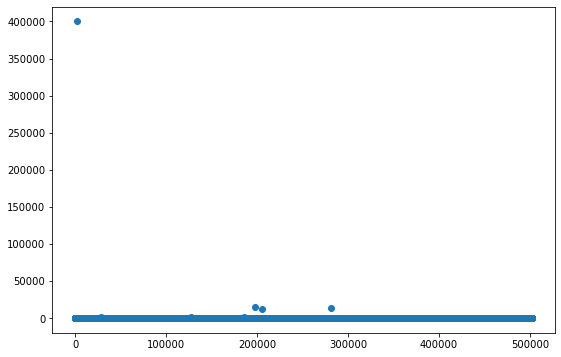

In [114]:
# bp sys 
target = pd.concat([final_t2[final_t2['read_2'].isin(['246..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['2469.'])]['value1']])
Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

(0.0, 500.0)

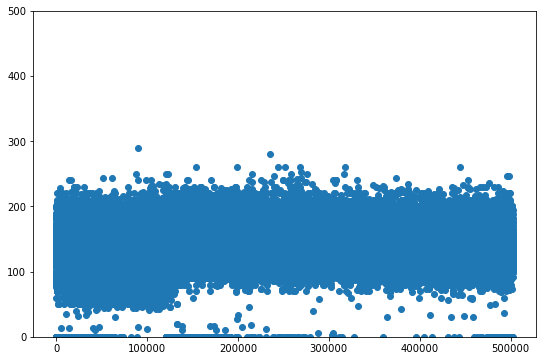

In [119]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 500))

In [120]:
# bp swap
dia_r2 = final_t2[final_t2['read_2'].isin(['246..'])]
dia_swap = dia_r2[dia_r2['value1'].astype(np.float) < dia_r2['value2'].astype(np.float)].index
keep_dia, keep_sys = final_t2.loc[dia_swap, 'value1'], final_t2.loc[dia_swap, 'value2']
final_t2.loc[dia_swap, 'value1'] = keep_sys
final_t2.loc[dia_swap, 'value2'] = keep_dia

/tmp/ipykernel_59449/1894590517.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dia_swap = dia_r2[dia_r2['value1'].astype(np.float) < dia_r2['value2'].astype(np.float)].index


In [121]:
# sys filtering
target = pd.concat([final_t2[final_t2['read_2'].isin(['246..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['2469.'])]['value1']])
Target = target.astype(np.float)

print(len(Target[Target > 250]))
sys_bp_upper = Target[Target > 250].index

print(len(Target[(Target < 50)]))
sys_bp_lower = Target[(Target < 50)].index

final_t2.drop(np.union1d(sys_bp_upper, sys_bp_lower), axis=0, inplace=True)

/tmp/ipykernel_59449/3351203418.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


20
976


/tmp/ipykernel_59449/3006200567.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


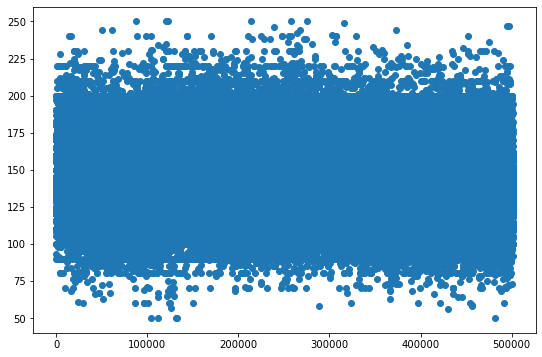

In [122]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['246..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['2469.'])]['value1']])
Target = target.astype(np.float)

plt.scatter(np.arange(len(Target)), Target.values)

/tmp/ipykernel_59449/2353290186.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


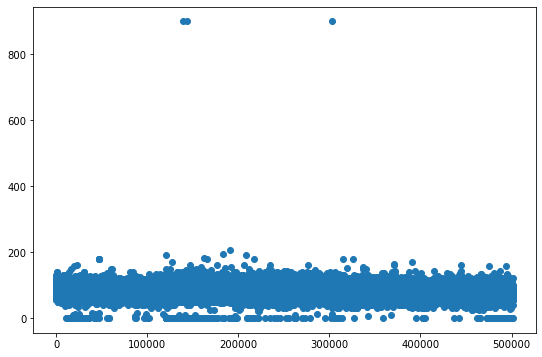

In [123]:
# bp dia
target = pd.concat([final_t2[final_t2['read_2'].isin(['246..'])]['value2'], 
                    final_t2[final_t2['read_3'].isin(['246A.'])]['value1']])
Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)


/tmp/ipykernel_59449/919289519.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


(0.0, 500.0)

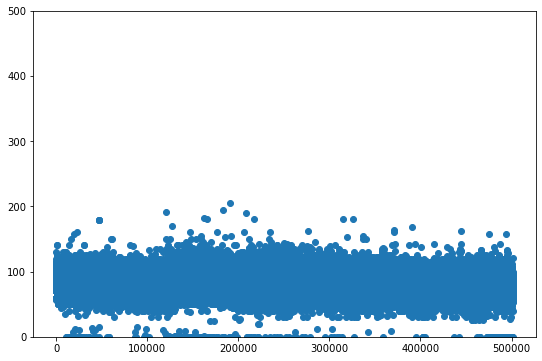

In [124]:
# bp dia
target = pd.concat([final_t2[final_t2['read_2'].isin(['246..'])]['value2'], 
                    final_t2[final_t2['read_3'].isin(['246A.'])]['value1']])
Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 500))

In [125]:
# dia filtering
print(len(Target[Target > 160]))
dia_upper = Target[Target > 160].index

print(len(Target[(Target < 20)]))
dia_lower = Target[(Target < 20)].index

final_t2.drop(np.union1d(dia_upper, dia_lower), axis=0, inplace=True)

21
312


/tmp/ipykernel_59449/4208621253.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


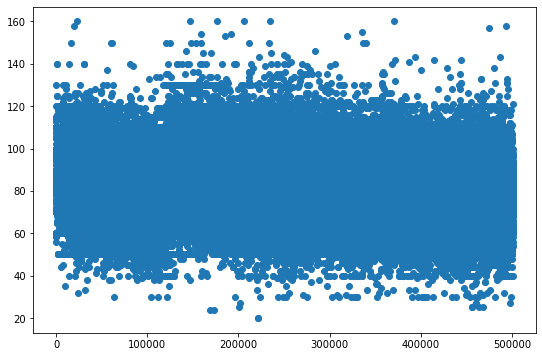

In [127]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['246..'])]['value2'], 
                    final_t2[final_t2['read_3'].isin(['246A.'])]['value1']])
Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

In [128]:
final_t2.shape

(16768183, 10)

## Weight(kg)

/tmp/ipykernel_59449/2952452925.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


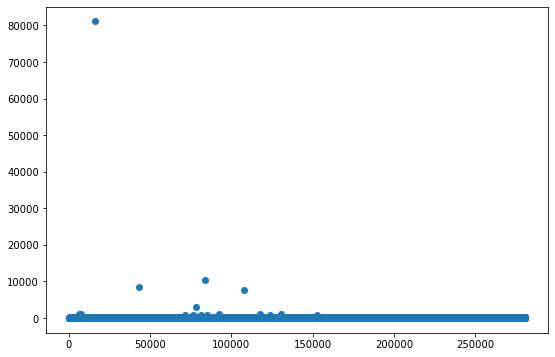

In [131]:
# weight
target = pd.concat([final_t2[final_t2['read_2'].isin(['22A..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['22A..'])]['value1']])
Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)


(0.0, 2000.0)

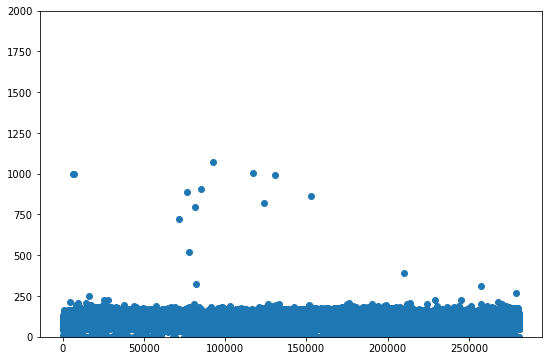

In [132]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 2000))

In [133]:
# weight filter
print(len(Target[Target > 250]))
weight_upper = Target[Target > 250].index

print(len(Target[(Target < 30)]))
weight_lower = Target[(Target < 30)].index

final_t2.drop(np.union1d(weight_upper, weight_lower), axis=0, inplace=True)

22
1871


/tmp/ipykernel_59449/841983294.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


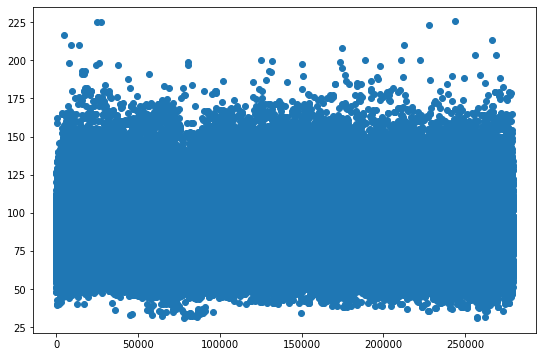

In [134]:
# weight
target = pd.concat([final_t2[final_t2['read_2'].isin(['22A..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['22A..'])]['value1']])
Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

In [135]:
final_t2.shape

(16766290, 10)

## Hba1c(%)

/tmp/ipykernel_59449/2578538339.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)
/tmp/ipykernel_59449/2578538339.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target2 = target2.astype(np.float)


(0.0, 300.0)

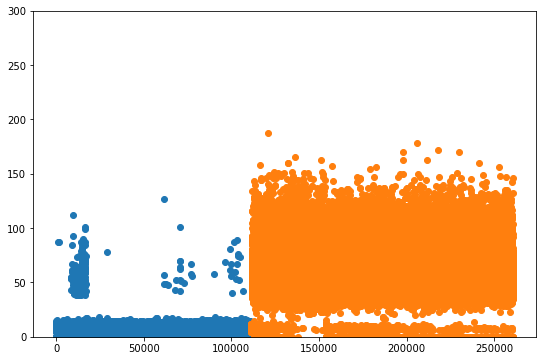

In [142]:
# Hba1c
# ['42W4.', 'XaERp']
target = pd.concat([final_t2[final_t2['read_2'].isin(['42W4.'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XaERp'])]['value1']])

target2 = pd.concat([final_t2[final_t2['read_2'].isin(['42W5.'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XaPbt'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

keep_val2_opr33 = final_t2.loc[target2[target2 == 'OPR003'].index]['value2']
target2[target2 == 'OPR003'] = keep_val2_opr33
# keep_val2_opr2 = final_t2.loc[target[target == 'OPR002'].index]['value2']
# target[target == 'OPR002'] = keep_val2_opr2

Target = target.astype(np.float)
Target2 = target2.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)
plt.scatter(np.arange(len(Target), len(Target)+len(Target2)), Target2.values)

plt.ylim((0, 300))

In [143]:
## read3
hb_r3 = final_t2[final_t2.loc[:, 'read_3'] == 'XaPbt']['value1']
# drop outliers > 240, keep >= 20
ii = hb_r3[hb_r3.astype(np.float) > 240].index
hb_r3.drop(ii, axis=0, inplace=True)
index = hb_r3[hb_r3.astype(np.float) >= 20].index
val = hb_r3[hb_r3.astype(np.float) >= 20].values
# convert IFCC to DCCT
final_t2.loc[index, 'value1'] = val.astype(np.float)*0.09148+2.152
final_t2['read_3'].replace('XaPbt', 'XaERp', inplace=True)


## read2
hb_r2 = final_t2[final_t2.loc[:, 'read_2'] == '42W5.']
# check value2, value3
hb_val2_r2 = hb_r2[hb_r2['value1'] == 'OPR003']['value2']
hb_val1_r2 = hb_r2.drop(hb_val2_r2.index, axis=0)['value1']
# drop outliers > 240, keep < 20
ii2 = hb_val1_r2[hb_val1_r2.astype(np.float) > 240].index
hb_val1_r2.drop(ii2, axis=0, inplace=True)
index2 = hb_val1_r2[hb_val1_r2.astype(np.float) >= 20].index
val2 = hb_val1_r2[hb_val1_r2.astype(np.float) >= 20].values

v2_ii2 = hb_val2_r2[hb_val2_r2.astype(np.float) > 240].index
hb_val2_r2.drop(v2_ii2, axis=0, inplace=True)
v2_index2 = hb_val2_r2[hb_val2_r2.astype(np.float) >= 20].index
v2_val2 = hb_val2_r2[hb_val2_r2.astype(np.float) >= 20].values

# convert IFCC to DCCT
final_t2.loc[index2, 'value1'] = val2.astype(np.float)*0.09148+2.152
final_t2.loc[v2_index2, 'value2'] = v2_val2.astype(np.float)*0.09148+2.152
final_t2.loc[v2_index2, 'value1'] = final_t2.loc[v2_index2, 'value2']
final_t2['read_2'].replace('42W5.', '42W4.', inplace=True)

/tmp/ipykernel_59449/2538789603.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ii = hb_r3[hb_r3.astype(np.float) > 240].index
/home/junhyeonglee/anaconda3/envs/torch/lib/python3.8/site-packages/pandas/core/generic.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)
/tmp/ipykernel_59449/2538789603.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not

/tmp/ipykernel_59449/2714056231.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


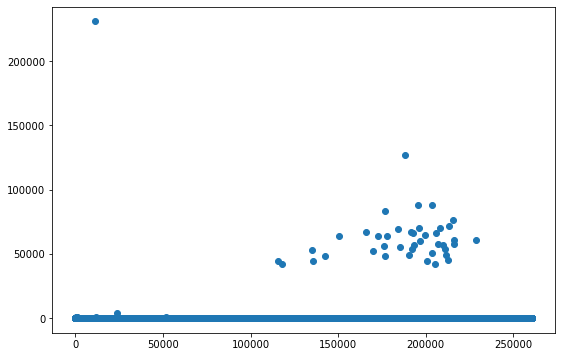

In [144]:
# Hba1c
# ['42W4.', 'XaERp']
target = pd.concat([final_t2[final_t2['read_2'].isin(['42W4.'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XaERp'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

# keep_val2_opr2 = final_t2.loc[target[target == 'OPR002'].index]['value2']
# target[target == 'OPR002'] = keep_val2_opr2

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

In [145]:
print(len(Target[Target > 20]))
hb_upper = Target[Target > 20].index

print(np.sum(Target < 2))
hb_lower = Target[Target < 2].index

final_t2.drop(np.union1d(hb_upper, hb_lower), axis=0, inplace=True)

238
10989


/tmp/ipykernel_59449/2941950132.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


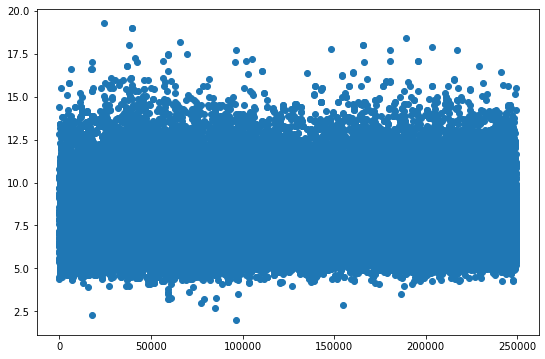

In [146]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['42W4.'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XaERp'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

In [147]:
final_t2.shape

(16755063, 10)

## Creatinine(micromoles/L)

/tmp/ipykernel_59449/2872873222.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


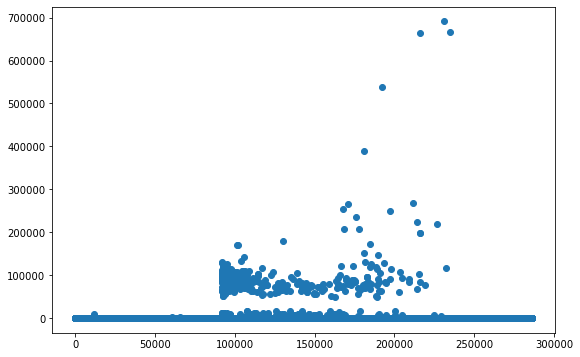

In [150]:
# Cretinine
# '44J3.', 'XE2q5
target = pd.concat([final_t2[final_t2['read_2'].isin(['44J3.'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XE2q5'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

keep_val2_opr2 = final_t2.loc[target[target == 'OPR002'].index]['value2']
target[target == 'OPR002'] = keep_val2_opr2

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

(0.0, 5000.0)

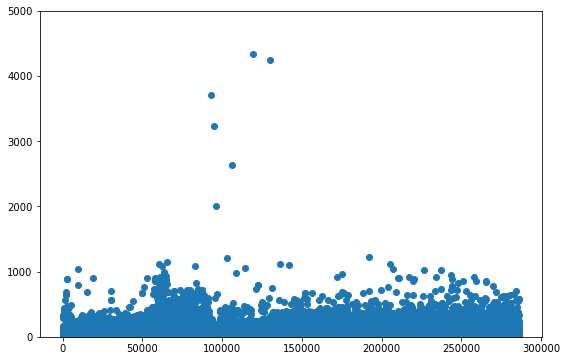

In [151]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 5000))

In [152]:
# creatinine filter
print(len(Target[Target > 1900]))
creatinine_upper = Target[Target > 1900].index

print(np.sum((Target < 20)))
creatinine_lower = Target[(Target < 20)].index

final_t2.drop(np.union1d(creatinine_upper, creatinine_lower), axis=0, inplace=True)

632
1710


/tmp/ipykernel_59449/1098639771.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


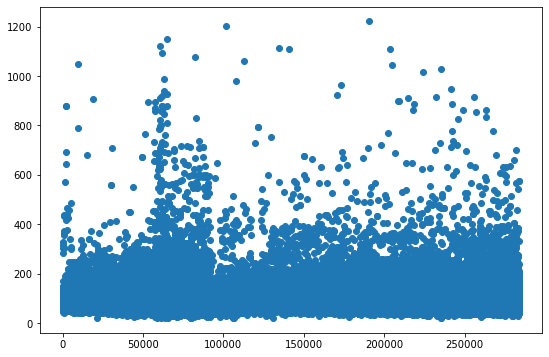

In [153]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['44J3.'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XE2q5'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

keep_val2_opr2 = final_t2.loc[target[target == 'OPR002'].index]['value2']
target[target == 'OPR002'] = keep_val2_opr2

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

## BMI(kg/m^2)

/tmp/ipykernel_59449/4237497498.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


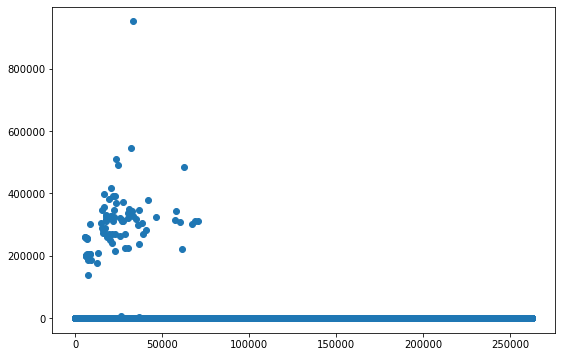

In [154]:
# BMI
target = pd.concat([final_t2[final_t2['read_2'].isin(['22K..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['22K..'])]['value1']])


Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

(0.0, 500.0)

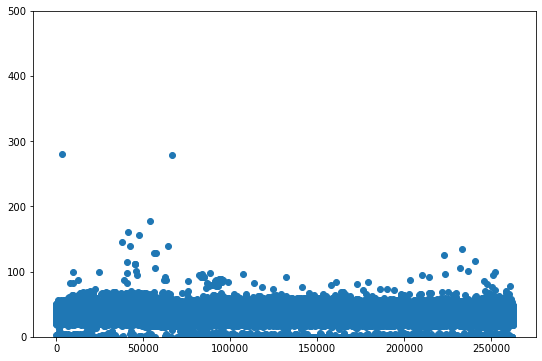

In [155]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 500))

In [156]:
# BMI filter
print(np.sum(Target > 100))
BMI_upper = Target[Target > 100].index

print(np.sum((Target < 12)))
BMI_lower = Target[(Target < 12)].index

final_t2.drop(np.union1d(BMI_upper, BMI_lower), axis=0, inplace=True)

114
3175


/tmp/ipykernel_59449/1279442012.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


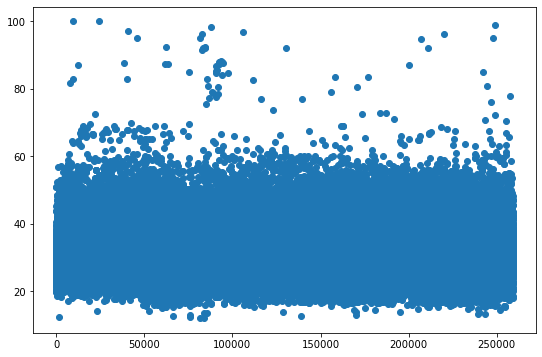

In [157]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['22K..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['22K..'])]['value1']])


Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

## Triglyceride(mmol/L)

/tmp/ipykernel_59449/2498149349.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


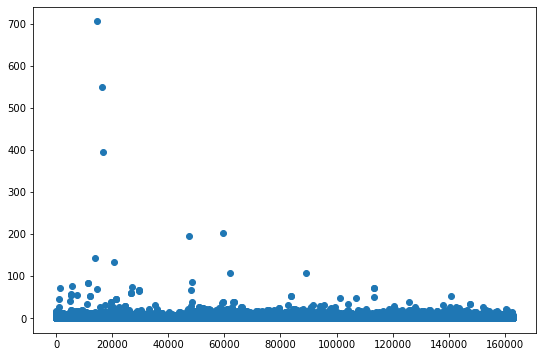

In [160]:
# triglyceride
# '44Q..', 'XE2q9'
target = pd.concat([final_t2[final_t2['read_2'].isin(['44Q..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XE2q9'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

# keep_val2_opr2 = final_t2.loc[target[target == 'OPR002'].index]['value2']
# target[target == 'OPR002'] = keep_val2_opr2

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

(0.0, 40.0)

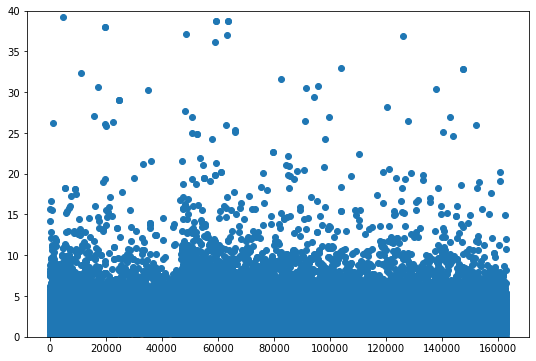

In [161]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 40))

In [162]:
# Triglyceride filter
print(np.sum(Target > 16))
Tri_upper = Target[Target > 16].index
print(np.sum(Target <= 0))
Tri_lower = Target[Target <= 0].index

final_t2.drop(Tri_upper, axis=0, inplace=True)
final_t2.drop(Tri_lower, axis=0, inplace=True)

174
1582


/tmp/ipykernel_59449/2051201771.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


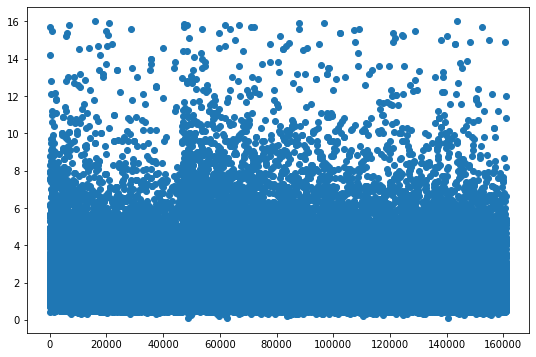

In [163]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['44Q..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XE2q9'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

# keep_val2_opr2 = final_t2.loc[target[target == 'OPR002'].index]['value2']
# target[target == 'OPR002'] = keep_val2_opr2

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

## Neutrophil(ANC, 1 = 1000cells/microL)

/tmp/ipykernel_59449/3730289962.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


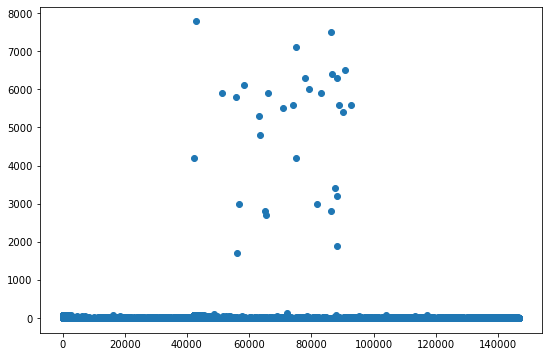

In [166]:
# neutrophil
# ['42J..', '42J..']

target = pd.concat([final_t2[final_t2['read_2'].isin(['42J..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['42J..'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

(0.0, 40.0)

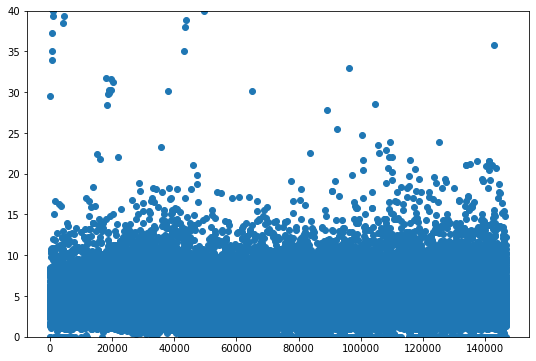

In [167]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 40))

In [168]:
# Neutrophil filter
print(np.sum(Target > 18))
neutro_upper = Target[(Target > 18)].index
print(np.sum(Target <= 0))
neutro_lower = Target[(Target <= 0)].index

final_t2.drop(neutro_upper, axis=0, inplace=True)
final_t2.drop(neutro_lower, axis=0, inplace=True)

705
1538


/tmp/ipykernel_59449/4268688977.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


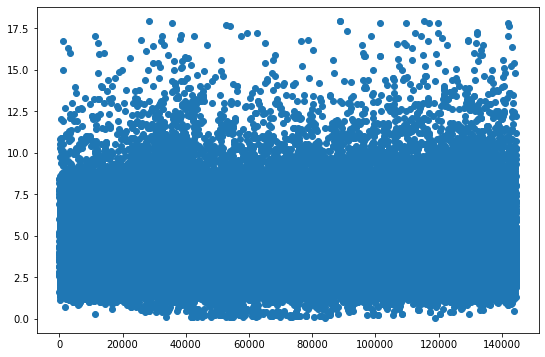

In [169]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['42J..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['42J..'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

## Lymphocyte(ALC, 1 = 1000cells/microL)

/tmp/ipykernel_59449/1810120053.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


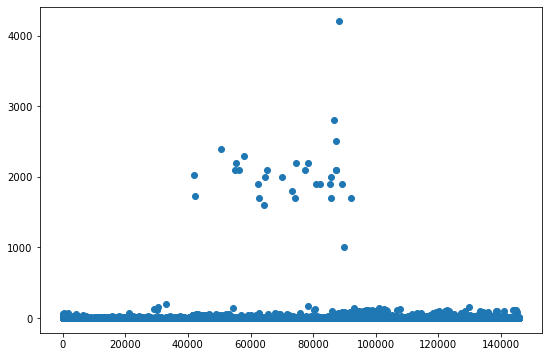

In [172]:
# lymphocyte
# ['42M..', '42M..']

target = pd.concat([final_t2[final_t2['read_2'].isin(['42M..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['42M..'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

(0.0, 40.0)

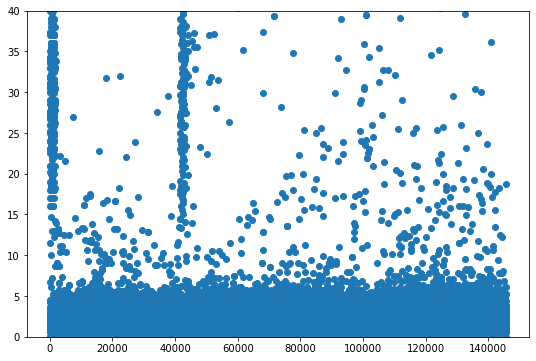

In [173]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 40))

In [267]:
# Lymphocyte filter
print(np.sum(Target > 16))
lymp_upper = Target[Target > 16].index
print(np.sum(Target <= 0))
lymp_lower = Target[Target <= 0].index

final_t2.drop(lymp_upper, axis=0, inplace=True)
final_t2.drop(lymp_lower, axis=0, inplace=True)

826
1299


/tmp/ipykernel_59449/2145642713.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


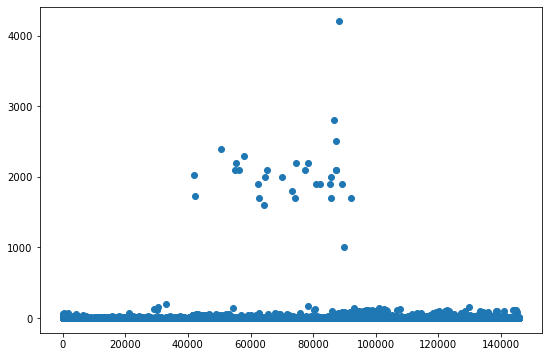

In [174]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['42M..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['42M..'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

## HDL(mmol/L)

/tmp/ipykernel_59449/3019803834.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


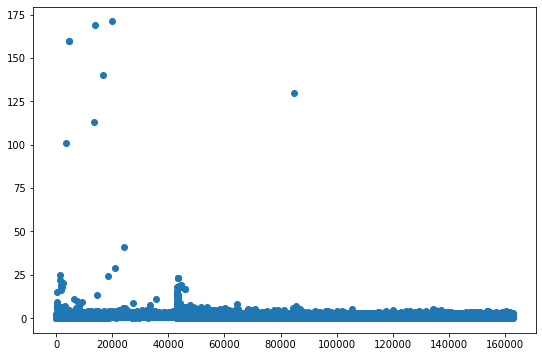

In [177]:
# HDL
# ['44P5.', '44P5.']
target = pd.concat([final_t2[final_t2['read_2'].isin(['44P5.'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['44P5.'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

(0.0, 10.0)

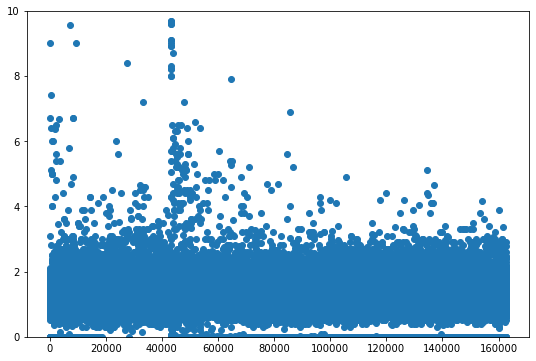

In [178]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 10))

In [179]:
# HDL filter
print(np.sum(Target > 4))
HDL_upper = Target[Target > 4].index
print(np.sum(Target <= 0))
HDL_lower = Target[Target <= 0].index

final_t2.drop(HDL_upper, axis=0, inplace=True)
final_t2.drop(HDL_lower, axis=0, inplace=True)

221
2759


/tmp/ipykernel_59449/2955066753.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


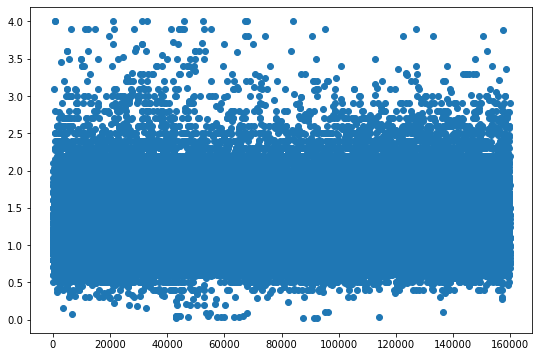

In [180]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['44P5.'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['44P5.'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

## LDL(mmol/L)

/tmp/ipykernel_59449/4031256457.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


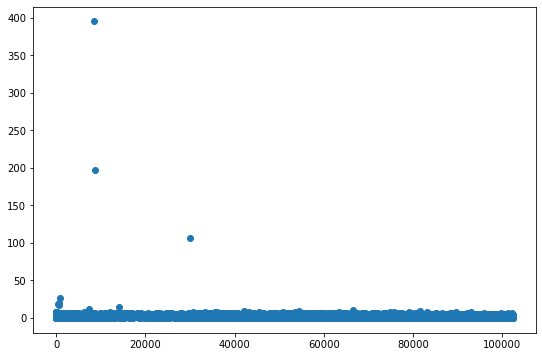

In [183]:
# LDL
# ['44P6.', '44P6.']
target = pd.concat([final_t2[final_t2['read_2'].isin(['44P6.'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['44P6.'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

(0.0, 10.0)

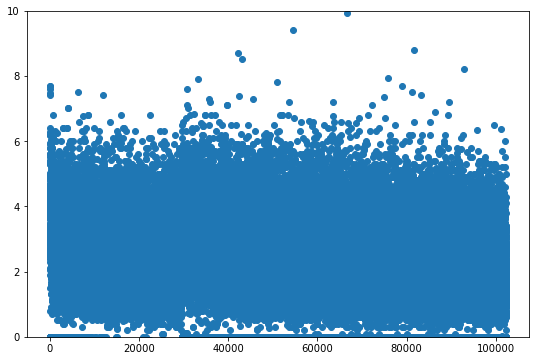

In [184]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 10))

In [185]:
# LDL filter
print(np.sum(Target > 8))
LDL_upper = Target[Target > 8].index
print(np.sum(Target <= 0))
LDL_lower = Target[Target <= 0].index

final_t2.drop(LDL_upper, axis=0, inplace=True)
final_t2.drop(LDL_lower, axis=0, inplace=True)

16
3432


/tmp/ipykernel_59449/2774106232.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


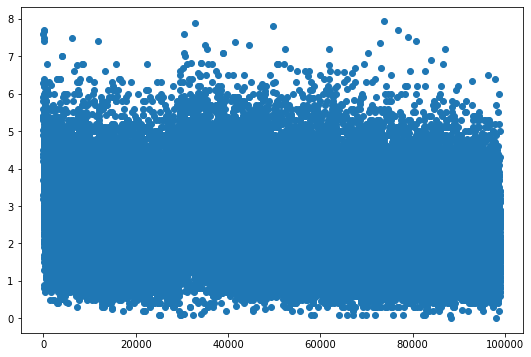

In [186]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['44P6.'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['44P6.'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values)

In [187]:
final_t2.shape

(16739005, 10)

## eGFR

/tmp/ipykernel_59449/1339287628.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


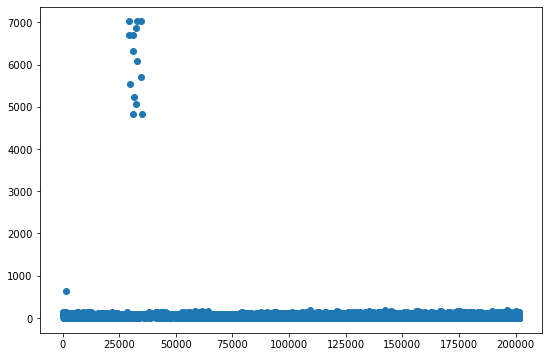

In [190]:
# eGFR
# ['451E.', 'XaK8y']
target = pd.concat([final_t2[final_t2['read_2'].isin(['451E.'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XaK8y'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3
keep_val2_opr4 = final_t2.loc[target[target == 'OPR004'].index]['value2']
target[target == 'OPR004'] = keep_val2_opr4
keep_val2_opr5 = final_t2.loc[target[target == 'OPR005'].index]['value2']
target[target == 'OPR005'] = keep_val2_opr5

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values);

(0.0, 300.0)

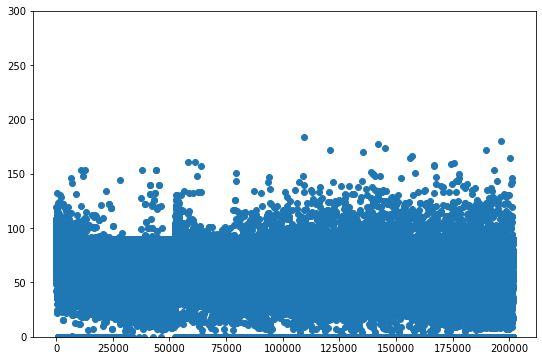

In [191]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 300))

In [192]:
# eGFR filter
print(np.sum(Target > 190))
eGFR_upper = Target[Target > 190].index
print(np.sum(Target <= 0))
eGFR_lower = Target[Target <= 0].index

final_t2.drop(eGFR_upper, axis=0, inplace=True)
final_t2.drop(eGFR_lower, axis=0, inplace=True)

15
25034


/tmp/ipykernel_59449/4127955718.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


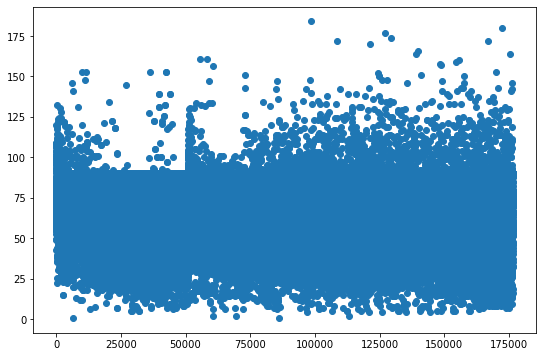

In [193]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['451E.'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XaK8y'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3
keep_val2_opr4 = final_t2.loc[target[target == 'OPR004'].index]['value2']
target[target == 'OPR004'] = keep_val2_opr4
keep_val2_opr5 = final_t2.loc[target[target == 'OPR005'].index]['value2']
target[target == 'OPR005'] = keep_val2_opr5

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values);

In [194]:
final_t2.shape

(16713956, 10)

# WBC(1000cells/microL)

In [ ]:
# WBC
# [ '42H..', 'XaIdY']

/tmp/ipykernel_59449/504872873.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


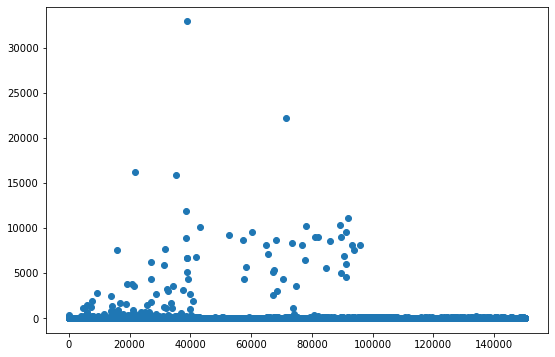

In [197]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['42H..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XaIdY'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values);

(0.0, 200.0)

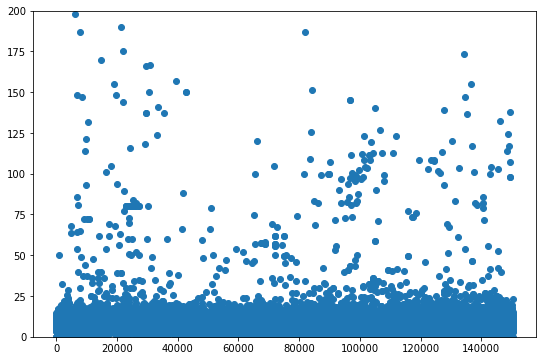

In [198]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 200))

In [199]:
# WBC filter
print(np.sum(Target > 100))
WBC_upper = Target[Target > 100].index
print(np.sum(Target <= 0))
WBC_lower = Target[Target <= 0].index

final_t2.drop(WBC_upper, axis=0, inplace=True)
final_t2.drop(WBC_lower, axis=0, inplace=True)

197
694


/tmp/ipykernel_59449/504872873.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


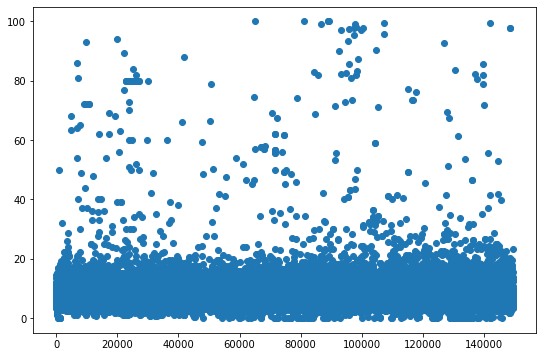

In [215]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['42H..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XaIdY'])]['value1']])

# swap code values
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values);

In [201]:
final_t2.shape

(16713065, 10)

# Total Cholesterol(mmol/L)

In [202]:
# ['44P..', 'XE2eD'] 

In [296]:
total_ch = final_t2[final_t2['read_2'].isin(['44P..']) | final_t2['read_3'].isin(['XE2eD'])]

In [300]:
total_ch[~total_ch['value2'].isnull()]['value1'].value_counts()

OPR003    4951
OPR002       1
Name: value1, dtype: int64

/tmp/ipykernel_59449/2059824935.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


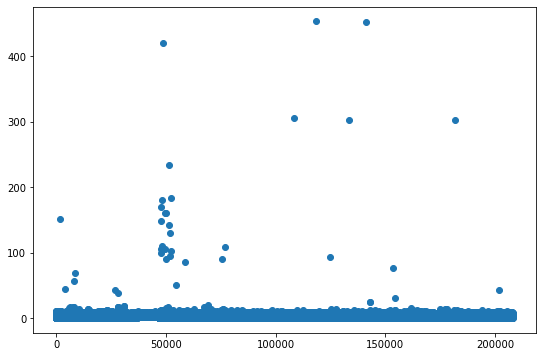

In [205]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['44P..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XE2eD'])]['value1']])

# swap code values
keep_val2_opr2 = final_t2.loc[target[target == 'OPR002'].index]['value2']
target[target == 'OPR002'] = keep_val2_opr2
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values);

(0.0, 100.0)

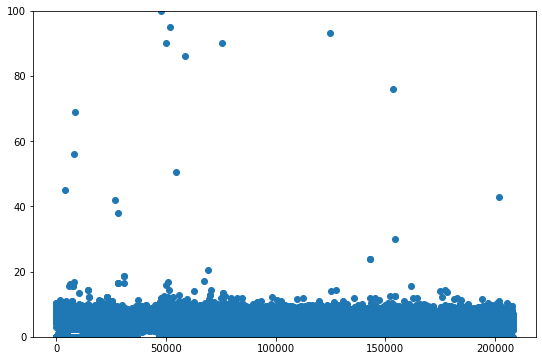

In [206]:
plt.scatter(np.arange(len(Target)), Target.values)
plt.ylim((0, 100))

In [207]:
# Total Cholesterol filter
print(np.sum(Target > 15))
Total_ch_upper = Target[Target > 15].index
print(np.sum(Target <= 0))
Total_ch_lower = Target[Target <= 0].index

final_t2.drop(Total_ch_upper, axis=0, inplace=True)
final_t2.drop(Total_ch_lower, axis=0, inplace=True)

55
7215


/tmp/ipykernel_59449/2059824935.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Target = target.astype(np.float)


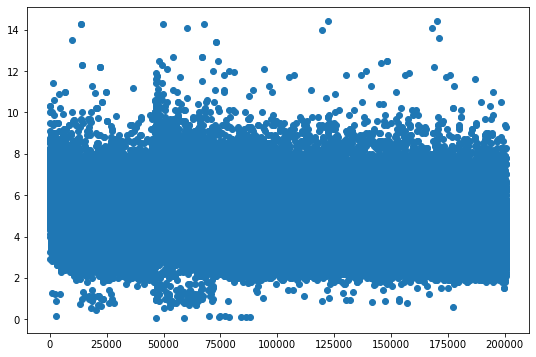

In [208]:
target = pd.concat([final_t2[final_t2['read_2'].isin(['44P..'])]['value1'], 
                    final_t2[final_t2['read_3'].isin(['XE2eD'])]['value1']])

# swap code values
keep_val2_opr2 = final_t2.loc[target[target == 'OPR002'].index]['value2']
target[target == 'OPR002'] = keep_val2_opr2
keep_val2_opr3 = final_t2.loc[target[target == 'OPR003'].index]['value2']
target[target == 'OPR003'] = keep_val2_opr3

Target = target.astype(np.float)
plt.scatter(np.arange(len(Target)), Target.values);

In [209]:
final_t2.shape

(16705795, 10)

In [108]:
# final_t2.loc[12417033]
# temp = final_t2[final_t2['eid'].isin([5078145])]
# temp[temp['read_2'].isin(['44P..']) | temp['read_3'].isin(['XE2eD'])]

In [210]:
final_t2.to_csv('filtered_final_t2.csv', index=None)